<a href="https://colab.research.google.com/github/sahil301290/rapids_ML_DS/blob/main/Unit_5_NLP_NMF_imdb_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferring Topics from IMDB Reviews

In [1]:
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
import matplotlib.pyplot as plt

## Exploring the Dataset: [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz)

In [ ]:
!unzip 'pos.zip'

In [3]:
ROOT = '/content/pos/'

In [4]:
reviews = []
for file in os.listdir(ROOT):
    path = os.path.join(ROOT, file)
    if os.path.isfile(path):
        with open(path, 'r') as fin:
            reviews.append(fin.read())

In [5]:
len(reviews)

12500

In [6]:
for i in range(3):
    print(reviews[i])
    print('=' * 150)

This movie will go down down in history as one of the greats, right along side of Citizen Kane, Casablanca, and On The Waterfront. Someone please convince Leno to do a sequel! Leno and Morita are a comedy duo, the likes of which haven't been seen since Abbot and Costello. The evil that emanates from Chris Sarandon, Tom Noonan, and Randall "Tex" Cobb will give you the chills. Dingman's character as the buffoonish oaf hearkens back to the days of Shakespeare's comedies. And the climax. My goodness, the climax. I won't ruin it for you, but it makes the explosion of the Death Star pale in comparison. If you can track down this hard-to-find gem, do yourself and your family a favor and buy it immediately. I'm still holding out hope for a special edition DVD one of these days.
A Bug's Life is a very good animated feature. This movie is for younger children, but it is also a great movie for people my age. The story is about an ant named Flik. He brought havoc onto his colony when he destroyed 

## Feature Extraction

In [7]:
vect = TfidfVectorizer(stop_words='english')
X = vect.fit_transform(reviews)

pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000s,003830,006,007,0079,0080,0083,0093638,...,élan,émigré,émigrés,était,état,étc,êxtase,ís,østbye,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NMF Decomposition

In [8]:
N_TOPICS = 15
nmf = NMF(n_components=N_TOPICS)
W = nmf.fit_transform(X)  # Document-topic matrix
H = nmf.components_       # Topic-term matrix

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [9]:
# Top 15 words per topic

words = np.array(vect.get_feature_names())
topic_words = pd.DataFrame(np.zeros((N_TOPICS, 10)), index=[f'Topic {i + 1}' for i in range(N_TOPICS)],
                           columns=[f'Word {i + 1}' for i in range(10)]).astype(str)
for i in range(N_TOPICS):
    ix = H[i].argsort()[::-1][:10]
    topic_words.iloc[i] = words[ix]

topic_words

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,br,10,ll,spoilers,end,simply,yes,just,scene,spoiler
Topic 2,movie,movies,watch,recommend,10,saw,acting,excellent,actors,feel
Topic 3,film,films,director,cinema,festival,characters,scenes,work,plot,art
Topic 4,series,episode,episodes,season,tv,characters,trek,seasons,shows,new
Topic 5,man,role,performance,character,best,cast,john,plays,actor,played
Topic 6,good,really,like,think,just,don,bad,pretty,thought,say
Topic 7,life,people,family,world,real,war,way,lives,like,young
Topic 8,funny,comedy,laugh,hilarious,fun,jokes,eddie,humor,funniest,murphy
Topic 9,story,characters,animation,disney,true,told,line,beautiful,acting,stories
Topic 10,seen,ve,time,years,saw,movies,best,dvd,watch,just


In [10]:
# Create a topic mapping

topic_mapping = {
    'Topic 4': 'TV',
    'Topic 7': 'War',
    'Topic 8': 'Comedy',
    'Topic 12': 'Book Adaptation',
    'Topic 13': 'Horror',
    'Topic 15': 'Martial Arts / Action'
}

In [11]:
# Recall the document-topic matrix, W

W = pd.DataFrame(W, columns=[f'Topic {i + 1}' for i in range(N_TOPICS)])
W['max_topic'] = W.apply(lambda x: topic_mapping.get(x.idxmax()), axis=1)
W[pd.notnull(W['max_topic'])].head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,max_topic
8,0.000221,0.002610,0.023915,0.000747,0.025198,0.000941,0.000000,0.003522,0.002707,0.010181,0.002919,0.005654,0.011602,0.002813,0.028792,Martial Arts / Action
10,0.037308,0.014999,0.000000,0.000045,0.010698,0.000000,0.001550,0.000369,0.000000,0.000000,0.000000,0.001819,0.037985,0.010352,0.000000,Horror
13,0.033848,0.000600,0.013828,0.002857,0.005643,0.000000,0.038277,0.001572,0.000000,0.001988,0.000000,0.000492,0.000000,0.011858,0.008558,War
16,0.025600,0.010107,0.012621,0.000000,0.002522,0.000000,0.010196,0.044188,0.001030,0.007092,0.000429,0.000000,0.000000,0.035819,0.000000,Comedy
22,0.034985,0.001372,0.048454,0.015213,0.003675,0.000000,0.000000,0.000000,0.000000,0.000937,0.000000,0.049754,0.000000,0.001540,0.000000,Book Adaptation
25,0.041778,0.001971,0.019335,0.025934,0.018136,0.015841,0.007552,0.002447,0.016415,0.026446,0.000000,0.044846,0.000000,0.000000,0.000000,Book Adaptation
27,0.006181,0.001503,0.000974,0.030108,0.005890,0.001868,0.021493,0.001119,0.000000,0.010751,0.002929,0.000000,0.000000,0.002258,0.000638,TV
32,0.022215,0.007069,0.014782,0.000000,0.007526,0.000000,0.006669,0.000000,0.003862,0.004196,0.019956,0.021522,0.043710,0.009518,0.000124,Horror
34,0.000000,0.058301,0.000000,0.000000,0.000000,0.026052,0.000000,0.011925,0.000000,0.000000,0.000000,0.000000,0.075509,0.000000,0.000000,Horror
36,0.044604,0.001270,0.000149,0.006532,0.000000,0.015587,0.000000,0.002874,0.000000,0.000292,0.000000,0.000000,0.046784,0.000000,0.002170,Horror


In [12]:
reviews[16]

'I saw it in a posh movie theater where the audience is usually white, educated, and urban. The showing I attended had a sprinkling of African-Americans, and it made the difference in audience-reaction between the two groups a wonderful social commentary on the state of race relations in this country. Basically, the white folks were AFRAID to laugh or laughed nervously at the funny bits --and there are many! -- because they\'d be "laughting at Blacks", while the Blacks also stayed pretty silent because many couldn\'t laugh at themselves in front of the whites. <br /><br />I, on the other hand, being Asian (and thus belonging to neither group), had a great time viewing this satire of rap culture and its egos/trappings/values/pseudo-philosophies. The cast is talented and does at great job becoming the characters portrayed. The songs are too funny to be believed.<br /><br />This film is one of the best pseudo-documentaries to come along, including "A Mighty Wind"'

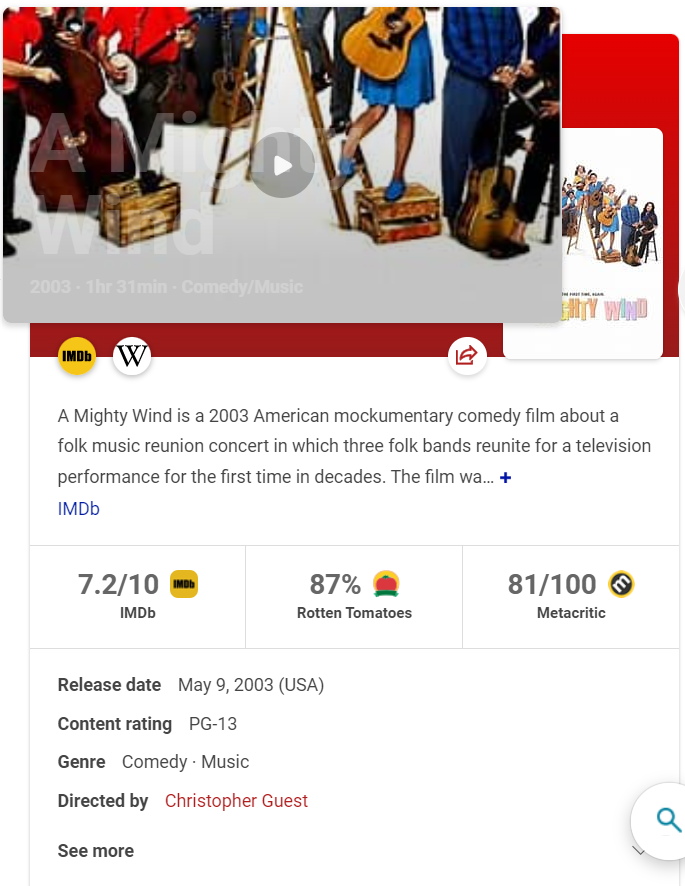